<a href="https://colab.research.google.com/github/uavinash15/DataScience-/blob/main/Notebooks/Classification/Chapter_5_Classification_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 5: Classification Problems

## 5.1 Classification Overview

## 5.3 Credit Classification

In [1081]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

credit_df = pd.read_csv( "German Credit Data.csv" )
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [1082]:
credit_df.iloc[0:5,1:7]

,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate
0,6,A34,1169,A65,A75,4
1,48,A32,5951,A61,A73,2
2,12,A34,2096,A61,A74,2
3,42,A32,7882,A61,A74,2
4,24,A33,4870,A61,A73,3


In [1083]:
credit_df.iloc[0:5,7:]

,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A93,4,67,A143,2,A173,0
1,A92,2,22,A143,1,A173,1
2,A93,3,49,A143,1,A172,0
3,A93,4,45,A143,1,A173,0
4,A93,4,53,A143,2,A173,1


In [1084]:
credit_df.status.value_counts()

,count
status,
0,700
1,300


In [1085]:
X_features = list( credit_df.columns )
X_features.remove( 'status' )
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

### 5.3.1 Encoding Categorical Features

In [1086]:
encoded_credit_df = pd.get_dummies( credit_df[X_features],
                                   drop_first = True ).astype(int)

In [1087]:
encoded_credit_df

,duration,amount,inst_rate,residing_since,age,num_credits,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,credit_history_A31,...,present_emp_since_A74,present_emp_since_A75,personal_status_A92,personal_status_A93,personal_status_A94,inst_plans_A142,inst_plans_A143,job_A172,job_A173,job_A174
0,6,1169,4,4,67,2,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,12,2096,2,3,49,1,0,0,1,0,...,1,0,0,1,0,0,1,1,0,0
3,42,7882,2,4,45,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
4,24,4870,3,4,53,2,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,0,0,1,0,...,1,0,1,0,0,0,1,1,0,0
996,30,3857,4,4,40,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
997,12,804,4,4,38,1,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0
998,45,1845,4,4,23,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [1088]:
list(encoded_credit_df.columns)

['duration',
 'amount',
 'inst_rate',
 'residing_since',
 'age',
 'num_credits',
 'checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A31',
 'credit_history_A32',
 'credit_history_A33',
 'credit_history_A34',
 'savings_acc_A62',
 'savings_acc_A63',
 'savings_acc_A64',
 'savings_acc_A65',
 'present_emp_since_A72',
 'present_emp_since_A73',
 'present_emp_since_A74',
 'present_emp_since_A75',
 'personal_status_A92',
 'personal_status_A93',
 'personal_status_A94',
 'inst_plans_A142',
 'inst_plans_A143',
 'job_A172',
 'job_A173',
 'job_A174']

In [1089]:
encoded_credit_df[['checkin_acc_A12',
                   'checkin_acc_A13',
                   'checkin_acc_A14']].head(5).astype(int)

,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14
0,0,0,0
1,1,0,0
2,0,0,1
3,0,0,0
4,0,0,0


In [1090]:
import statsmodels.api as sm

Y = credit_df.status
X = sm.add_constant( encoded_credit_df )

In [1091]:
Y

,status
0,0
1,1
2,0
3,0
4,1
...,...
995,0
996,0
997,0
998,1


In [1092]:
X

,const,duration,amount,inst_rate,residing_since,age,num_credits,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,...,present_emp_since_A74,present_emp_since_A75,personal_status_A92,personal_status_A93,personal_status_A94,inst_plans_A142,inst_plans_A143,job_A172,job_A173,job_A174
0,1.0,6,1169,4,4,67,2,0,0,0,...,0,1,0,1,0,0,1,0,1,0
1,1.0,48,5951,2,2,22,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,1.0,12,2096,2,3,49,1,0,0,1,...,1,0,0,1,0,0,1,1,0,0
3,1.0,42,7882,2,4,45,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
4,1.0,24,4870,3,4,53,2,0,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,12,1736,3,4,31,1,0,0,1,...,1,0,1,0,0,0,1,1,0,0
996,1.0,30,3857,4,4,40,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
997,1.0,12,804,4,4,38,1,0,0,1,...,0,1,0,1,0,0,1,0,1,0
998,1.0,45,1845,4,4,23,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


### 5.3.2 Splitting into Train and Validation Sets

In [1093]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [1094]:
X_train.head()

,const,duration,amount,inst_rate,residing_since,age,num_credits,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,...,present_emp_since_A74,present_emp_since_A75,personal_status_A92,personal_status_A93,personal_status_A94,inst_plans_A142,inst_plans_A143,job_A172,job_A173,job_A174
541,1.0,24,2032,4,4,60,2,0,0,1,...,0,1,0,1,0,0,1,0,1,0
440,1.0,12,1884,4,4,39,1,0,0,1,...,0,1,0,1,0,0,1,0,0,1
482,1.0,30,3622,4,4,57,2,0,0,0,...,0,1,1,0,0,0,1,0,1,0
422,1.0,12,958,2,3,47,2,1,0,0,...,1,0,0,1,0,0,1,1,0,0
778,1.0,36,5711,4,2,38,2,0,0,1,...,0,1,0,1,0,0,1,0,0,1


In [1095]:
X_train.shape

(700, 30)

In [1096]:
X_test.head()

,const,duration,amount,inst_rate,residing_since,age,num_credits,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,...,present_emp_since_A74,present_emp_since_A75,personal_status_A92,personal_status_A93,personal_status_A94,inst_plans_A142,inst_plans_A143,job_A172,job_A173,job_A174
521,1.0,18,3190,2,2,24,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
737,1.0,18,4380,3,4,35,1,0,0,0,...,0,0,0,1,0,0,1,1,0,0
740,1.0,24,2325,2,3,32,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
660,1.0,12,1297,3,4,23,1,0,1,0,...,0,0,0,0,1,0,1,0,1,0
411,1.0,33,7253,3,2,35,2,0,0,1,...,1,0,0,1,0,0,1,0,0,1


In [1097]:
X_test.shape

(300, 30)

In [1098]:
y_train.head()

,status
541,0
440,0
482,0
422,0
778,0


In [1099]:
y_train.shape

(700,)

In [1100]:
y_test.head()

,status
521,1
737,0
740,0
660,0
411,0


In [1101]:
y_test.shape

(300,)

### 5.3.3 Building Logistic Regression Model

In [1102]:
import statsmodels.api as sm

# Convert boolean columns in X_train to integers (0 or 1)
X_train = X_train.astype(int)

logit = sm.Logit(y_train, X_train)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.488938
         Iterations 6


### 5.3.4 Printing Model Summary

In [1103]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Method:            MLE       
Dependent Variable:   status            Pseudo R-squared:  0.198     
Date:                 2026-01-14 07:40  AIC:               744.5132  
No. Observations:     700               BIC:               881.0456  
Df Model:             29                Log-Likelihood:    -342.26   
Df Residuals:         670               LL-Null:           -426.75   
Converged:            1.0000            LLR p-value:       1.0630e-21
No. Iterations:       6.0000            Scale:             1.0000    
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
const                 -0.1511   1.1349 -0.1331 0.8941 -2.3754  2.0733
duration               0.0206   0.0104  1.9927 0.0463  0.0003  0.0409
amount                 0.0001   0.0000  2.3765 0.0175  0.0000  0.0002
inst_rate              0.3064   0.0986  3.1083 0.0019  0.1132  0.4996
residing_since         0.0967   0.0920  1.0511 0.2932 -0.0836  0.2771
age                   -0.0227   0.0103 -2.2131 0.0269 -0.0428 -0.0026
num_credits            0.2854   0.2139  1.3342 0.1821 -0.1338  0.7045
checkin_acc_A12       -0.4126   0.2391 -1.7260 0.0843 -0.8812  0.0559
checkin_acc_A13       -0.9053   0.4338 -2.0868 0.0369 -1.7556 -0.0550
checkin_acc_A14       -1.6052   0.2586 -6.2073 0.0000 -2.1120 -1.0983
credit_history_A31     0.1532   0.5795  0.2643 0.7916 -0.9827  1.2890
credit_history_A32    -0.4960   0.4411 -1.1245 0.2608 -1.3604  0.3685
credit_history_A33    -0.8881   0.5022 -1.7683 0.0770 -1.8724  0.0962
credit_history_A34    -1.4124   0.4528 -3.1190 0.0018 -2.2999 -0.5249
savings_acc_A62       -0.0496   0.3208 -0.1545 0.8772 -0.6782  0.5791
savings_acc_A63       -0.6640   0.4818 -1.3779 0.1682 -1.6084  0.2804
savings_acc_A64       -1.1099   0.6019 -1.8439 0.0652 -2.2896  0.0699
savings_acc_A65       -0.6061   0.2745 -2.2080 0.0272 -1.1441 -0.0681
present_emp_since_A72  0.0855   0.4722  0.1810 0.8564 -0.8401  1.0110
present_emp_since_A73 -0.0339   0.4492 -0.0754 0.9399 -0.9142  0.8465
present_emp_since_A74 -0.3789   0.4790 -0.7910 0.4289 -1.3178  0.5600
present_emp_since_A75 -0.2605   0.4554 -0.5721 0.5673 -1.1532  0.6321
personal_status_A92   -0.0069   0.4841 -0.0142 0.9887 -0.9557  0.9419
personal_status_A93   -0.4426   0.4764 -0.9291 0.3528 -1.3762  0.4911
personal_status_A94   -0.3080   0.5554 -0.5546 0.5792 -1.3967  0.7806
inst_plans_A142       -0.2976   0.5157 -0.5772 0.5638 -1.3084  0.7131
inst_plans_A143       -0.4458   0.2771 -1.6086 0.1077 -0.9889  0.0974
job_A172              -0.0955   0.7681 -0.1243 0.9011 -1.6009  1.4100
job_A173              -0.0198   0.7378 -0.0269 0.9786 -1.4658  1.4262
job_A174              -0.0428   0.7371 -0.0581 0.9537 -1.4876  1.4019
=====================================================================

"""

### 5.3.5 Model Dignostics

In [1104]:
var_p_vals_df = pd.DataFrame(logit_model.pvalues )
var_p_vals_df

,0
const,8.941041e-01
duration,4.629398e-02
amount,1.747666e-02
inst_rate,1.881840e-03
residing_since,2.932187e-01
age,2.689338e-02
num_credits,1.821379e-01
checkin_acc_A12,8.434601e-02
checkin_acc_A13,3.690689e-02
checkin_acc_A14,5.388728e-10


In [1105]:
var_p_vals_df['vars'] = var_p_vals_df.index
var_p_vals_df

,0,vars
const,8.941041e-01,const
duration,4.629398e-02,duration
amount,1.747666e-02,amount
inst_rate,1.881840e-03,inst_rate
residing_since,2.932187e-01,residing_since
age,2.689338e-02,age
num_credits,1.821379e-01,num_credits
checkin_acc_A12,8.434601e-02,checkin_acc_A12
checkin_acc_A13,3.690689e-02,checkin_acc_A13
checkin_acc_A14,5.388728e-10,checkin_acc_A14


In [1106]:
 var_p_vals_df.columns = ['pvals', 'vars']
 var_p_vals_df

,pvals,vars
const,8.941041e-01,const
duration,4.629398e-02,duration
amount,1.747666e-02,amount
inst_rate,1.881840e-03,inst_rate
residing_since,2.932187e-01,residing_since
age,2.689338e-02,age
num_credits,1.821379e-01,num_credits
checkin_acc_A12,8.434601e-02,checkin_acc_A12
checkin_acc_A13,3.690689e-02,checkin_acc_A13
checkin_acc_A14,5.388728e-10,checkin_acc_A14


In [1107]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [1108]:
significant_vars = get_significant_vars( logit_model )

significant_vars

['duration',
 'amount',
 'inst_rate',
 'age',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A34',
 'savings_acc_A65']

In [1109]:
final_logit = sm.Logit( y_train,
            sm.add_constant( X_train[significant_vars] ) ).fit()

Optimization terminated successfully.
         Current function value: 0.511350
         Iterations 6


In [1110]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Method:           MLE       
Dependent Variable:  status           Pseudo R-squared: 0.161     
Date:                2026-01-14 07:40 AIC:              733.8898  
No. Observations:    700              BIC:              774.8495  
Df Model:            8                Log-Likelihood:   -357.94   
Df Residuals:        691              LL-Null:          -426.75   
Converged:           1.0000           LLR p-value:      7.4185e-26
No. Iterations:      6.0000           Scale:            1.0000    
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
const              -0.8969   0.4364 -2.0551 0.0399 -1.7523 -0.0415
duration            0.0197   0.0098  2.0033 0.0451  0.0004  0.0390
amount              0.0001   0.0000  2.3205 0.0203  0.0000  0.0002
inst_rate           0.2811   0.0929  3.0264 0.0025  0.0991  0.4632
age                -0.0216   0.0089 -2.4207 0.0155 -0.0392 -0.0041
checkin_acc_A13    -0.8038   0.4081 -1.9697 0.0489 -1.6037 -0.0040
checkin_acc_A14    -1.5452   0.2187 -7.0649 0.0000 -1.9738 -1.1165
credit_history_A34 -0.8781   0.2319 -3.7858 0.0002 -1.3327 -0.4235
savings_acc_A65    -0.5448   0.2581 -2.1108 0.0348 -1.0507 -0.0389
==================================================================

"""

### 5.3.6 Predicting on Test Data

In [1111]:
y_pred_df = pd.DataFrame( { "actual": y_test,
                            "predicted_prob": final_logit.predict(
                        sm.add_constant( X_test[significant_vars].astype(int) ) ) } )

In [1112]:
y_pred_df

,actual,predicted_prob
521,1,0.452449
737,0,0.491820
740,0,0.418416
660,0,0.270285
411,0,0.132119
...,...,...
468,0,0.178787
935,1,0.587925
428,0,0.091998
7,0,0.571859


In [1113]:
y_pred_df.sample(10, random_state = 42)

,actual,predicted_prob
557,1,0.080493
798,0,0.076653
977,0,0.345979
136,0,0.249919
575,0,0.062264
544,0,0.040768
332,1,0.833093
917,1,0.370667
678,0,0.388392
363,0,0.088952


In [1114]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(
                            lambda x: 1 if x > 0.5 else 0)

y_pred_df.sample(10, random_state = 42)

,actual,predicted_prob,predicted
557,1,0.080493,0
798,0,0.076653,0
977,0,0.345979,0
136,0,0.249919,0
575,0,0.062264,0
544,0,0.040768,0
332,1,0.833093,1
917,1,0.370667,0
678,0,0.388392,0
363,0,0.088952,0


### 5.3.7 Creating a Confusion Matrix

In [1115]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn import metrics

In [1116]:
def draw_cm( actual, predicted ):
    ## Cret
    cm = metrics.confusion_matrix( actual, predicted, labels=[1,0] )
    sn.heatmap(cm, annot=True,  fmt='.2f',
               xticklabels = ["Bad credit", "Good Credit"] ,
               yticklabels = ["Bad credit", "Good Credit"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

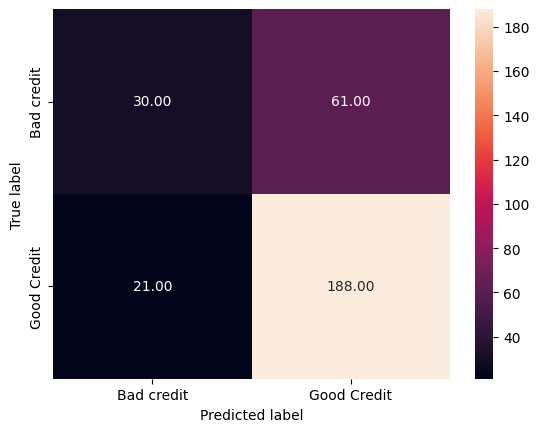

In [1117]:
draw_cm( y_pred_df.actual,
        y_pred_df.predicted )

### 5.3.8 Measuring Accuracies

In [1118]:
print( metrics.classification_report( y_pred_df.actual,
                                     y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       209
           1       0.59      0.33      0.42        91

    accuracy                           0.73       300
   macro avg       0.67      0.61      0.62       300
weighted avg       0.70      0.73      0.70       300



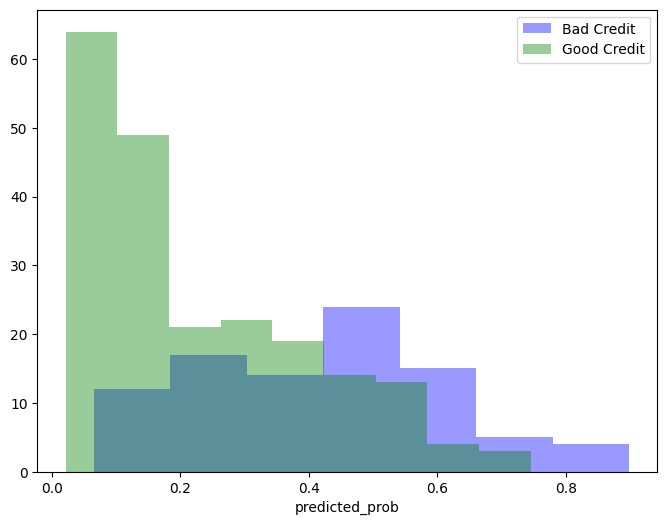

In [1119]:
plt.figure( figsize = (8,6) )
sn.distplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"],
            kde=False, color = 'b',
            label = 'Bad Credit' )
sn.distplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"],
            kde=False, color = 'g',
            label = 'Good Credit' )
plt.legend()
plt.show()

### 5.3.9 ROC & AUC

In [1120]:
def draw_roc( actual, probs ):
    fpr, \
    tpr, \
    thresholds = metrics.roc_curve( actual,
                                    probs,
                                    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

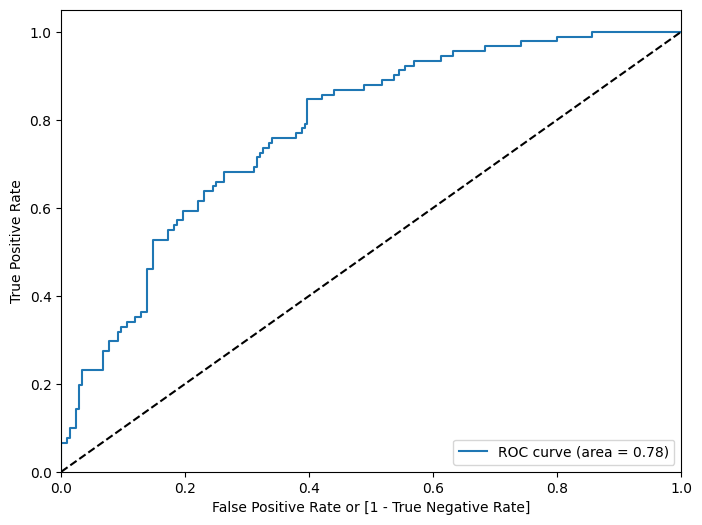

In [1121]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual,
                                 y_pred_df.predicted_prob)

In [1122]:
auc_score = metrics.roc_auc_score( y_pred_df.actual,
                                  y_pred_df.predicted_prob  )
round( float( auc_score ), 2 )

0.78

### 5.3.10 Finding Optimal Cutoff

#### 5.3.10.1 Youden's index

In [1123]:
tpr_fpr = pd.DataFrame( { 'tpr': tpr,
                         'fpr': fpr,
                         'thresholds': thresholds } )

tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values( 'diff', ascending = False )[0:5]

,tpr,fpr,thresholds,diff
160,0.846154,0.397129,0.221534,0.449025
161,0.846154,0.401914,0.216531,0.444240
162,0.846154,0.406699,0.215591,0.439455
159,0.835165,0.397129,0.223980,0.438036
166,0.857143,0.421053,0.207107,0.436090


In [1124]:
y_pred_df['predicted_new'] = y_pred_df.predicted_prob.map(
                                lambda x: 1 if x > 0.22 else 0)

In [1125]:
y_pred_df

,actual,predicted_prob,predicted,predicted_new
521,1,0.452449,0,1
737,0,0.491820,0,1
740,0,0.418416,0,1
660,0,0.270285,0,1
411,0,0.132119,0,0
...,...,...,...,...
468,0,0.178787,0,0
935,1,0.587925,1,1
428,0,0.091998,0,0
7,0,0.571859,1,1


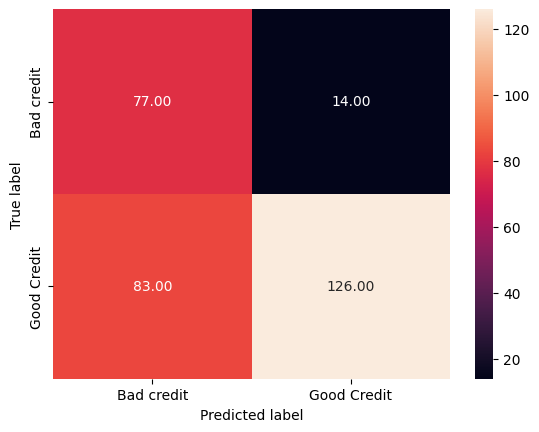

In [1126]:
draw_cm( y_pred_df.actual,
        y_pred_df.predicted_new)

In [1127]:
print(metrics.classification_report( y_pred_df.actual,
                                     y_pred_df.predicted_new ))

              precision    recall  f1-score   support

           0       0.90      0.60      0.72       209
           1       0.48      0.85      0.61        91

    accuracy                           0.68       300
   macro avg       0.69      0.72      0.67       300
weighted avg       0.77      0.68      0.69       300



#### 5.3.10.2 Cost Based Approach

In [1128]:
def get_total_cost( actual, predicted, cost_FPs, cost_FNs ):
    cm = metrics.confusion_matrix( actual, predicted, labels=[1,0] )
    cm_mat = np.array( cm )
    return cm_mat[0,1] * cost_FNs + cm_mat[1,0] * cost_FPs

In [1129]:
cost_df = pd.DataFrame( columns = ['prob', 'cost'])

In [1130]:
cost_df

,prob,cost


In [1131]:
idx = 0

## iterate cut-off probability values between 0.1 and 0.5
for each_prob in range( 10, 50):
    cost = get_total_cost( y_pred_df.actual,
                          y_pred_df.predicted_prob.map(
            lambda x: 1 if x > (each_prob/100)  else 0), 1, 5 )
    cost_df.loc[idx] = [(each_prob/100), cost]
    idx += 1

In [1132]:
cost_df

,prob,cost
0,0.10,162.0
1,0.11,163.0
2,0.12,154.0
3,0.13,158.0
4,0.14,150.0
5,0.15,156.0
6,0.16,157.0
7,0.17,158.0
8,0.18,159.0
9,0.19,156.0


In [1133]:
cost_df.sort_values( 'cost', ascending = True )

,prob,cost
4,0.14,150.0
12,0.22,153.0
10,0.20,154.0
2,0.12,154.0
5,0.15,156.0
9,0.19,156.0
11,0.21,157.0
6,0.16,157.0
7,0.17,158.0
3,0.13,158.0


In [1134]:
y_pred_df['predicted_using_cost'] = y_pred_df.predicted_prob.map(
    lambda x: 1 if x > 0.14 else 0)

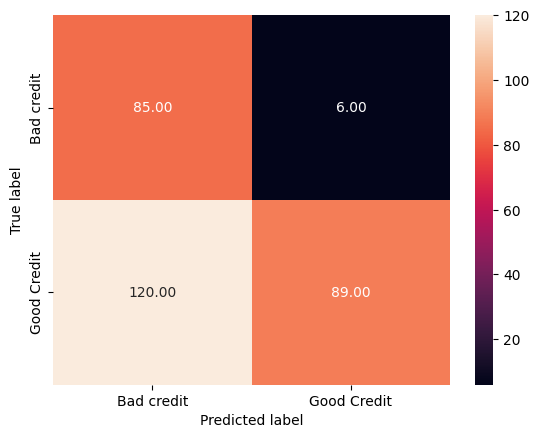

In [1135]:
draw_cm( y_pred_df.actual,
        y_pred_df.predicted_using_cost )

## 5.4 Gain Chart and Lift Chart

### 5.4.1 Loading and Preparing the Dataset

In [1136]:
import pandas as pd
bank_df = pd.read_csv( 'bank.csv' )
bank_df.head( 5 )

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [1137]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4521 non-null   object
 2   marital            4521 non-null   object
 3   education          4521 non-null   object
 4   default            4521 non-null   object
 5   balance            4521 non-null   int64 
 6   housing-loan       4521 non-null   object
 7   personal-loan      4521 non-null   object
 8   current-campaign   4521 non-null   int64 
 9   previous-campaign  4521 non-null   int64 
 10  subscribed         4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.7+ KB


In [1138]:
X_features = list( bank_df.columns )
X_features.remove( 'subscribed' )
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing-loan',
 'personal-loan',
 'current-campaign',
 'previous-campaign']

In [1139]:
encoded_bank_df = pd.get_dummies( bank_df[X_features],
                                 drop_first = True )

In [1140]:
encoded_bank_df

,age,balance,current-campaign,previous-campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing-loan_yes,personal-loan_yes
0,30,1787,1,0,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
1,33,4789,1,4,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,True,True
2,35,1350,1,1,False,False,False,True,False,False,...,False,False,False,True,False,True,False,False,True,False
3,30,1476,4,0,False,False,False,True,False,False,...,False,False,True,False,False,True,False,False,True,True
4,59,0,1,0,True,False,False,False,False,False,...,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,5,0,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,True,False
4517,57,-3313,1,0,False,False,False,False,False,True,...,False,False,True,False,False,True,False,True,True,True
4518,57,295,11,0,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
4519,28,1137,4,3,True,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False


In [1141]:
Y = bank_df.subscribed.map( lambda x: int( x == 'yes') )
X = encoded_bank_df

In [1142]:
Y

,subscribed
0,0
1,0
2,0
3,0
4,0
...,...
4516,0
4517,0
4518,0
4519,0


In [1143]:
X=X.astype(int)
X.head()

,age,balance,current-campaign,previous-campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing-loan_yes,personal-loan_yes
0,30,1787,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,33,4789,1,4,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1
2,35,1350,1,1,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
3,30,1476,4,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,1
4,59,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


#### 5.4.2 Building the Logistic Regression Model

In [1144]:
logit_model = sm.Logit( Y, sm.add_constant( X ) ).fit()

Optimization terminated successfully.
         Current function value: 0.335572
         Iterations 7


In [1145]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Method:           MLE       
Dependent Variable:   subscribed       Pseudo R-squared: 0.061     
Date:                 2026-01-14 07:40 AIC:              3082.2384 
No. Observations:     4521             BIC:              3236.2341 
Df Model:             23               Log-Likelihood:   -1517.1   
Df Residuals:         4497             LL-Null:          -1615.5   
Converged:            1.0000           LLR p-value:      1.4866e-29
No. Iterations:       7.0000           Scale:            1.0000    
-------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const               -1.7573   0.3799 -4.6251 0.0000 -2.5019 -1.0126
age                  0.0078   0.0058  1.3395 0.1804 -0.0036  0.0191
balance             -0.0000   0.0000 -0.2236 0.8231 -0.0000  0.0000
current-campaign    -0.0905   0.0238 -3.8042 0.0001 -0.1371 -0.0439
previous-campaign    0.1414   0.0212  6.6569 0.0000  0.0998  0.1830
job_blue-collar     -0.3412   0.2000 -1.7060 0.0880 -0.7331  0.0508
job_entrepreneur    -0.2900   0.3161 -0.9175 0.3589 -0.9096  0.3295
job_housemaid       -0.0166   0.3339 -0.0497 0.9603 -0.6711  0.6379
job_management      -0.0487   0.1984 -0.2455 0.8061 -0.4375  0.3401
job_retired          0.5454   0.2503  2.1794 0.0293  0.0549  1.0360
job_self-employed   -0.2234   0.2895 -0.7715 0.4404 -0.7909  0.3441
job_services        -0.2248   0.2245 -1.0012 0.3167 -0.6648  0.2152
job_student          0.3888   0.3181  1.2223 0.2216 -0.2346  1.0122
job_technician      -0.2101   0.1874 -1.1213 0.2622 -0.5773  0.1571
job_unemployed      -0.3723   0.3336 -1.1162 0.2643 -1.0261  0.2815
job_unknown          0.3193   0.4620  0.6913 0.4894 -0.5861  1.2248
marital_married     -0.4012   0.1440 -2.7857 0.0053 -0.6835 -0.1189
marital_single      -0.0463   0.1676 -0.2763 0.7823 -0.3749  0.2822
education_secondary  0.2128   0.1680  1.2670 0.2052 -0.1164  0.5420
education_tertiary   0.3891   0.1935  2.0103 0.0444  0.0098  0.7684
education_unknown   -0.1956   0.2927 -0.6682 0.5040 -0.7693  0.3781
default_yes          0.2286   0.3670  0.6228 0.5334 -0.4908  0.9479
housing-loan_yes    -0.5355   0.1024 -5.2273 0.0000 -0.7362 -0.3347
personal-loan_yes   -0.7139   0.1689 -4.2268 0.0000 -1.0449 -0.3829
===================================================================

"""

In [1146]:
significant_vars = get_significant_vars( logit_model )

significant_vars

['const',
 'current-campaign',
 'previous-campaign',
 'job_retired',
 'marital_married',
 'education_tertiary',
 'housing-loan_yes',
 'personal-loan_yes']

In [1147]:
X_features = ['current-campaign',
              'previous-campaign',
              'job_retired',
              'marital_married',
              'education_tertiary',
              'housing-loan_yes',
              'personal-loan_yes']

In [1148]:
logit_model_2 = sm.Logit( Y, sm.add_constant( X[X_features] ) ).fit()

Optimization terminated successfully.
         Current function value: 0.337228
         Iterations 7


In [1149]:
logit_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Method:           MLE       
Dependent Variable:   subscribed       Pseudo R-squared: 0.056     
Date:                 2026-01-14 07:40 AIC:              3065.2182 
No. Observations:     4521             BIC:              3116.5501 
Df Model:             7                Log-Likelihood:   -1524.6   
Df Residuals:         4513             LL-Null:          -1615.5   
Converged:            1.0000           LLR p-value:      8.1892e-36
No. Iterations:       7.0000           Scale:            1.0000    
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const              -1.4754   0.1133 -13.0260 0.0000 -1.6974 -1.2534
current-campaign   -0.0893   0.0236  -3.7925 0.0001 -0.1355 -0.0432
previous-campaign   0.1419   0.0211   6.7097 0.0000  0.1004  0.1833
job_retired         0.8246   0.1731   4.7628 0.0000  0.4853  1.1639
marital_married    -0.3767   0.0969  -3.8878 0.0001 -0.5667 -0.1868
education_tertiary  0.2991   0.1014   2.9500 0.0032  0.1004  0.4978
housing-loan_yes   -0.5834   0.0986  -5.9179 0.0000 -0.7767 -0.3902
personal-loan_yes  -0.7025   0.1672  -4.2012 0.0000 -1.0302 -0.3748
===================================================================

"""

In [1150]:
y_pred_df = pd.DataFrame( { 'actual': Y,
                            'predicted_prob': logit_model_2.predict(
                            sm.add_constant( X[X_features] ) ) } )

In [1151]:
y_pred_df

,actual,predicted_prob
0,0,0.125484
1,0,0.065379
2,0,0.153527
3,0,0.039308
4,0,0.074130
...,...,...
4516,0,0.053042
4517,0,0.050772
4518,0,0.055482
4519,0,0.143832


In [1152]:
sorted_predict_df = y_pred_df[['predicted_prob',
                               'actual']].sort_values( 'predicted_prob',
                                                    ascending = False )

In [1153]:
sorted_predict_df

,predicted_prob,actual
3682,0.864769,0
97,0.828031,0
3426,0.706809,0
1312,0.642337,1
3930,0.631032,1
...,...,...
298,0.005058,1
3125,0.004998,0
1363,0.003996,0
4301,0.001717,0


In [1154]:
num_per_decile = int( len( sorted_predict_df ) / 10 )
print( "Number of observations per decile: ", num_per_decile)

Number of observations per decile:  452


In [1155]:
df=sorted_predict_df

In [1156]:
df.head()

,predicted_prob,actual
3682,0.864769,0
97,0.828031,0
3426,0.706809,0
1312,0.642337,1
3930,0.631032,1


In [1157]:
'''
df['decile'] = 1
df.head()
'''

"\ndf['decile'] = 1\ndf.head()\n"

In [1158]:
'''
idx=0
idx
'''

'\nidx=0\nidx\n'

In [1159]:
'''
for each_d in range( 0, 10 ):
  print('idx: ',idx)
  print('idx+num_per_decile: ',idx+num_per_decile)
  print('df.columns.get_loc(\'decile\'): ',df.columns.get_loc('decile'))
  print('each_d: ',each_d)
  print("df.iloc[idx:idx+num_per_decile, df.columns.get_loc('decile')]")
  print(df.iloc[idx:idx+num_per_decile, df.columns.get_loc('decile')] )
  df.iloc[idx:idx+num_per_decile, df.columns.get_loc('decile')] = each_d
  print('each_d: ',each_d)
  print('df.iloc[idx:idx+num_per_decile, df.columns.get_loc(\'decile\')]: ')
  print(df.iloc[idx:idx+num_per_decile, df.columns.get_loc('decile')] )
  print('num_per_decile: ',num_per_decile)
  idx += num_per_decile
  print('idx: ',idx)
  print('------------------------------------')
  '''

'\nfor each_d in range( 0, 10 ):\n  print(\'idx: \',idx)\n  print(\'idx+num_per_decile: \',idx+num_per_decile)\n  print(\'df.columns.get_loc(\'decile\'): \',df.columns.get_loc(\'decile\'))\n  print(\'each_d: \',each_d)\n  print("df.iloc[idx:idx+num_per_decile, df.columns.get_loc(\'decile\')]")\n  print(df.iloc[idx:idx+num_per_decile, df.columns.get_loc(\'decile\')] )\n  df.iloc[idx:idx+num_per_decile, df.columns.get_loc(\'decile\')] = each_d\n  print(\'each_d: \',each_d)\n  print(\'df.iloc[idx:idx+num_per_decile, df.columns.get_loc(\'decile\')]: \')\n  print(df.iloc[idx:idx+num_per_decile, df.columns.get_loc(\'decile\')] )\n  print(\'num_per_decile: \',num_per_decile)\n  idx += num_per_decile\n  print(\'idx: \',idx)\n  print(\'------------------------------------\')\n  '

In [1160]:
'''
df
'''

'\ndf\n'

In [1161]:
'''
df['decile'] = df['decile'] + 1
df
'''

"\ndf['decile'] = df['decile'] + 1\ndf\n"

In [1162]:
def get_deciles( df ):
    df['decile'] = 1

    idx = 0

    for each_d in range( 0, 10 ):
        df.iloc[idx:idx+num_per_decile, df.columns.get_loc('decile')] = each_d
        idx += num_per_decile

    df['decile'] = df['decile'] + 1

    return df

In [1163]:
deciles_predict_df = get_deciles( sorted_predict_df )

In [1164]:
deciles_predict_df[0:5]

,predicted_prob,actual,decile
3682,0.864769,0,1
97,0.828031,0,1
3426,0.706809,0,1
1312,0.642337,1,1
3930,0.631032,1,1


In [1165]:
deciles_predict_df

,predicted_prob,actual,decile
3682,0.864769,0,1
97,0.828031,0,1
3426,0.706809,0,1
1312,0.642337,1,1
3930,0.631032,1,1
...,...,...,...
298,0.005058,1,10
3125,0.004998,0,10
1363,0.003996,0,10
4301,0.001717,0,10


In [1166]:
gain_lift_df = pd.DataFrame(
    deciles_predict_df.groupby(
            'decile')['actual'].sum() ).reset_index()
gain_lift_df.columns = ['decile', 'gain']

In [1167]:
gain_lift_df

,decile,gain
0,1,124
1,2,85
2,3,72
3,4,50
4,5,34
5,6,46
6,7,37
7,8,29
8,9,24
9,10,20


In [1168]:
gain_lift_df.gain.cumsum()

,gain
0,124
1,209
2,281
3,331
4,365
5,411
6,448
7,477
8,501
9,521


In [1169]:
gain_lift_df.gain.sum()

np.int64(521)

In [1170]:
gain_lift_df['gain_percentage'] = (100 *
            gain_lift_df.gain.cumsum()/gain_lift_df.gain.sum())

In [1171]:
gain_lift_df

,decile,gain,gain_percentage
0,1,124,23.800384
1,2,85,40.115163
2,3,72,53.934741
3,4,50,63.531670
4,5,34,70.057582
5,6,46,78.886756
6,7,37,85.988484
7,8,29,91.554702
8,9,24,96.161228
9,10,20,100.000000


In [1172]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

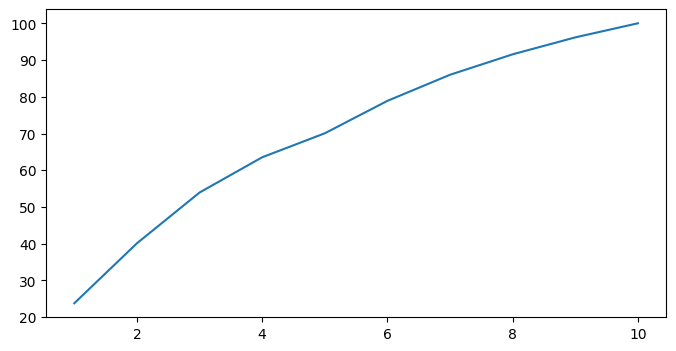

In [1173]:
plt.figure( figsize = (8,4))
plt.plot( gain_lift_df['decile'],
         gain_lift_df['gain_percentage'], '-' )

plt.show()

#### Calculating Lift

In [1174]:
gain_lift_df['lift'] = ( gain_lift_df.gain_percentage
                        / ( gain_lift_df.decile * 10) )

In [1175]:
gain_lift_df

,decile,gain,gain_percentage,lift
0,1,124,23.800384,2.380038
1,2,85,40.115163,2.005758
2,3,72,53.934741,1.797825
3,4,50,63.531670,1.588292
4,5,34,70.057582,1.401152
5,6,46,78.886756,1.314779
6,7,37,85.988484,1.228407
7,8,29,91.554702,1.144434
8,9,24,96.161228,1.068458
9,10,20,100.000000,1.000000


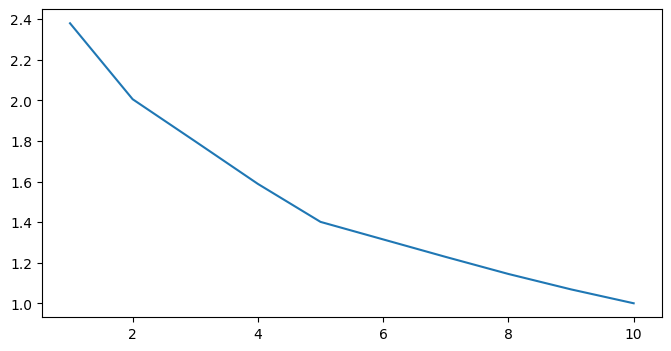

In [1176]:
plt.figure( figsize = (8,4))
plt.plot( gain_lift_df['decile'], gain_lift_df['lift'], '-' )
plt.show()

## 5.5 Decision Trees

### 5.5.1 Split the dataset

In [1177]:
credit_df

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,1736,A61,A74,3,A92,4,31,A143,1,A172,0
996,A11,30,A32,3857,A61,A73,4,A91,4,40,A143,1,A174,0
997,A14,12,A32,804,A61,A75,4,A93,4,38,A143,1,A173,0
998,A11,45,A32,1845,A61,A73,4,A93,4,23,A143,1,A173,1


In [1178]:
encoded_credit_df

,duration,amount,inst_rate,residing_since,age,num_credits,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,credit_history_A31,...,present_emp_since_A74,present_emp_since_A75,personal_status_A92,personal_status_A93,personal_status_A94,inst_plans_A142,inst_plans_A143,job_A172,job_A173,job_A174
0,6,1169,4,4,67,2,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,12,2096,2,3,49,1,0,0,1,0,...,1,0,0,1,0,0,1,1,0,0
3,42,7882,2,4,45,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
4,24,4870,3,4,53,2,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,0,0,1,0,...,1,0,1,0,0,0,1,1,0,0
996,30,3857,4,4,40,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
997,12,804,4,4,38,1,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0
998,45,1845,4,4,23,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [1179]:
Y = credit_df.status
X = encoded_credit_df

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split( X, Y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [1180]:
X_train.head()

,duration,amount,inst_rate,residing_since,age,num_credits,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,credit_history_A31,...,present_emp_since_A74,present_emp_since_A75,personal_status_A92,personal_status_A93,personal_status_A94,inst_plans_A142,inst_plans_A143,job_A172,job_A173,job_A174
541,24,2032,4,4,60,2,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0
440,12,1884,4,4,39,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,1
482,30,3622,4,4,57,2,0,0,0,0,...,0,1,1,0,0,0,1,0,1,0
422,12,958,2,3,47,2,1,0,0,0,...,1,0,0,1,0,0,1,1,0,0
778,36,5711,4,2,38,2,0,0,1,0,...,0,1,0,1,0,0,1,0,0,1


In [1181]:
X_test.head()

,duration,amount,inst_rate,residing_since,age,num_credits,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,credit_history_A31,...,present_emp_since_A74,present_emp_since_A75,personal_status_A92,personal_status_A93,personal_status_A94,inst_plans_A142,inst_plans_A143,job_A172,job_A173,job_A174
521,18,3190,2,2,24,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
737,18,4380,3,4,35,1,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
740,24,2325,2,3,32,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
660,12,1297,3,4,23,1,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
411,33,7253,3,2,35,2,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1


In [1182]:
y_train.head()

,status
541,0
440,0
482,0
422,0
778,0


In [1183]:
y_test.head()

,status
521,1
737,0
740,0
660,0
411,0


In [1184]:
X_train.shape

(700, 29)

In [1185]:
X_test.shape

(300, 29)

In [1186]:
y_train.shape

(700,)

In [1187]:
y_test.shape

(300,)

### 5.5.2 Building Decision Tree classifier using Gini Criteria

In [1188]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 3 )

In [1189]:
clf_tree

DecisionTreeClassifier(max_depth=3)

In [1190]:
clf_tree.fit( X_train, y_train )
clf_tree

DecisionTreeClassifier(max_depth=3)

### 5.5.3 Measuring Test Accuracy

In [1191]:
tree_predict = clf_tree.predict( X_test )
metrics.roc_auc_score( y_test, tree_predict )

np.float64(0.5835743204164258)

### 5.5.4 Displaying the Tree

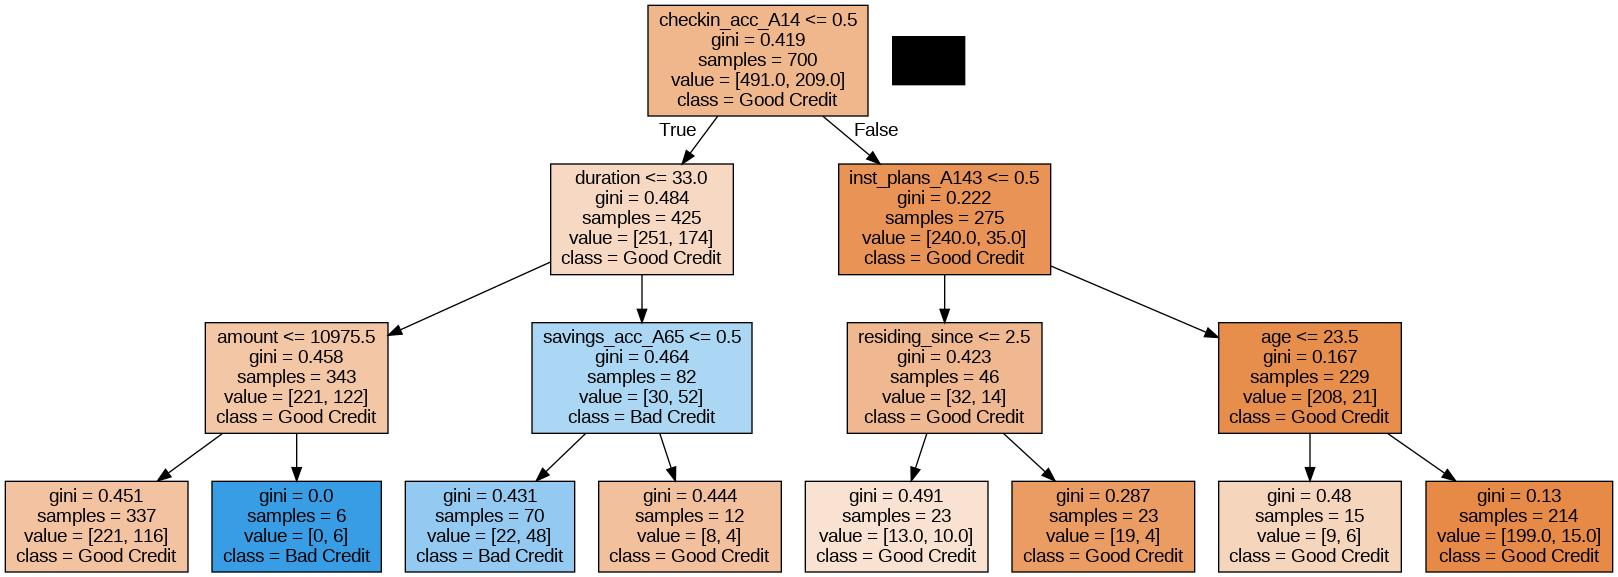

In [1193]:
from sklearn.tree  import export_graphviz
import pydotplus as pdot
from IPython.display import Image

# Export the tree into odt file
export_graphviz( clf_tree,
              out_file = "chd_tree.odt",
              feature_names = X_train.columns,
              class_names= ['Good Credit', 'Bad Credit'],
              filled = True)

# Read the create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'chd_tree.odt' )
chd_tree_graph.write_jpg( 'chd_tree.png' )
# Render the png file
Image(filename='chd_tree.png')

### 5.5.5 Understanding Gini Impurity

In [1194]:
gini_node_1 = 1 - pow(491/700, 2) - pow (209/700, 2)
print( round( gini_node_1, 4) )

0.4189


In [1195]:
X_test.shape

(300, 29)

### 5.5.6 Building Decision Tree using Entropy Criteria

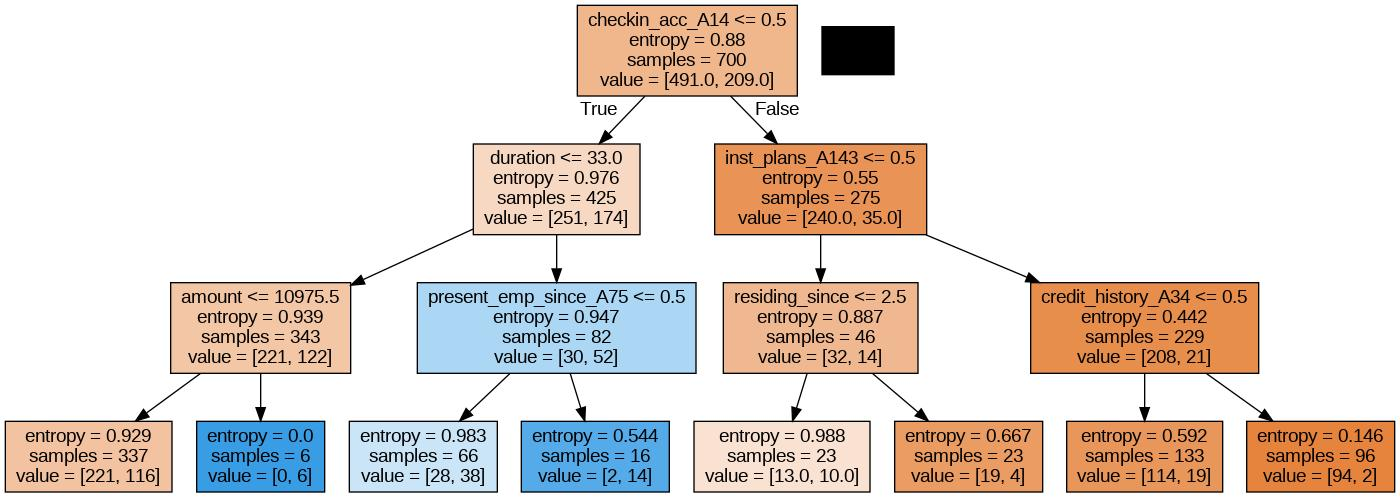

In [1196]:
clf_tree_entropy = DecisionTreeClassifier( criterion = 'entropy',
                                          max_depth = 3 )
clf_tree_entropy.fit( X_train, y_train )

# Export the tree into odt file
export_graphviz( clf_tree_entropy,
              out_file = "chd_tree_entropy.odt",
              feature_names = X_train.columns,
              filled = True )

# Read the create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'chd_tree_entropy.odt' )
chd_tree_graph.write_jpg( 'chd_tree_entropy.png' )
# Render the png file
Image(filename='chd_tree_entropy.png')

#### Calculating entropy impurity

In [1197]:
import math

entropy_node_1 = - (491/700) * math.log2(491/700) - (209/700) * math.log2(209/700)
print( round( entropy_node_1, 2) )

0.88


#### Measuring test accuracy

In [1198]:
tree_predict = clf_tree_entropy.predict( X_test )
metrics.roc_auc_score( y_test, tree_predict )

np.float64(0.5763972869236027)

### 5.5.7 Finding optimal criteria and max_depth

In [1199]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'criterion': ['gini','entropy'],
                     'max_depth': range(2,10)}]

print('tuned_parameters: ')
print(tuned_parameters)
clf_tree = DecisionTreeClassifier()

clf = GridSearchCV(clf_tree,
                 tuned_parameters,
                 cv=10,
                 scoring='roc_auc')

clf.fit(X_train, y_train )

tuned_parameters: 
[{'criterion': ['gini', 'entropy'], 'max_depth': range(2, 10)}]


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [1200]:
clf.best_score_

np.float64(0.6830090864917396)

In [1201]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 4}